# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

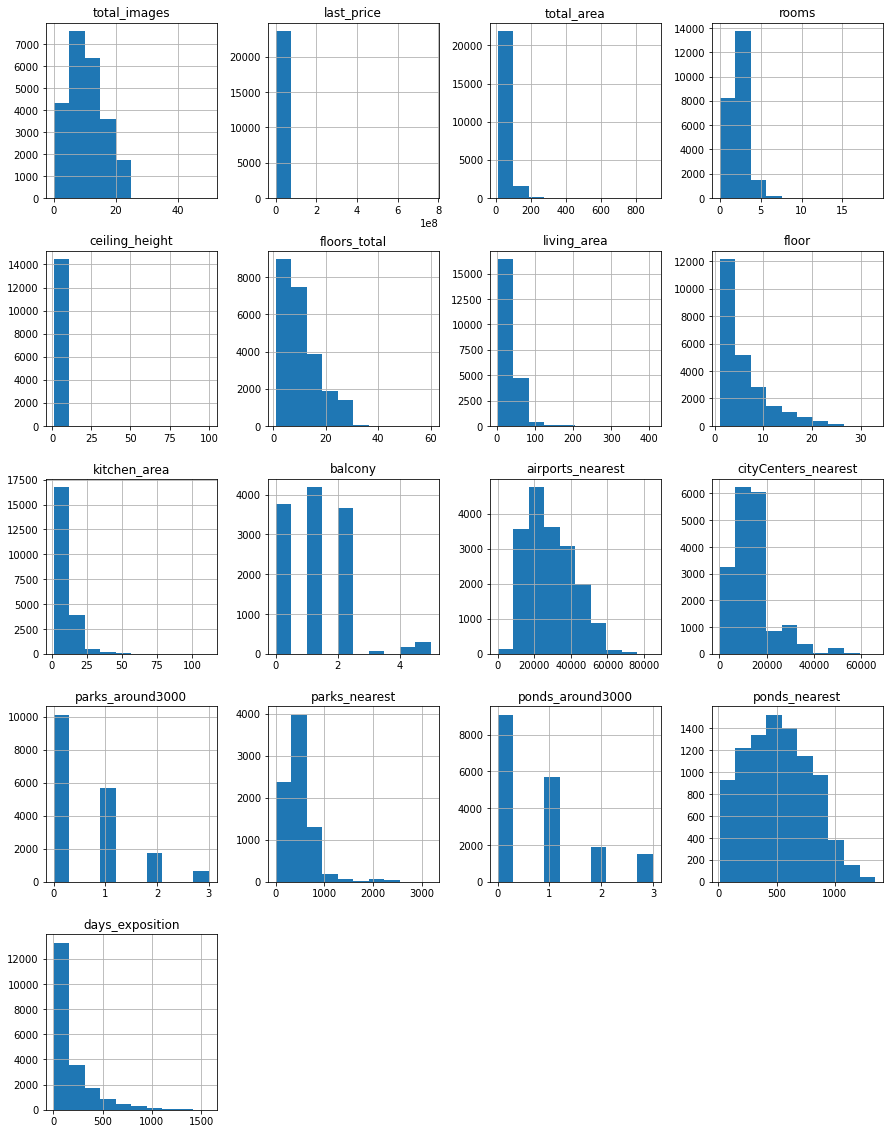

In [2]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

(23699, 22)

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в

ceiling_height(высота потолков) могут быть связаны либо с технической ошибкой либо продавец не посчитал нужным заполнять эту информацию

living_area(жилая площадь в квадратных метрах) причины могут быть те же самые

is_apartment(апартаменты) вероятнее всего данные помещения не являются апартаментами, поэтому продавцы не стали заполнять этот столбец

kitchen_area(площадь кухни) либо не заполнили, либо это студия

balcony(количество балконов) вероятнее всего балконов нет

locality_name(название населённого пункта) вероятнее всего техническая ошибка

airports_nearest(расстояние до ближайшего аэропорта) вероятно в округе нет аэропортов

cityCenters_nearest(расстояние до центра города) центр города находится достаточно далеко 

parks_around3000(число парков в радиусе 3 км) вероятнее всего парков в округе нет

parks_nearest(расстояние до ближайшего парка) вероятнее всего пропуск в связи с тем, что парков в округе нет, либо продавцы не 
посчитали это важной информацией

ponds_around3000(число водоёмов в радиусе 3 км) вероятнее всего водоёмов в округе нет

ponds_nearest(расстояние до ближайшего водоёма) вероятнее всего пропуск в связи с тем, что водоёмов в округе нет, либо продавцы не посчитали это важной информацией

days_exposition (сколько дней было размещено объявление (от публикации до снятия)) вероятнее всего объявление не сняли либо техническая ошибка

**Дополнения кода**

In [5]:

x=(data['total_area'].median())/(data['living_area'].median())
data['living_area']=data['living_area'].fillna(round(data['total_area']/x))
y=(data['total_area'].median())/(data['kitchen_area'].median())
data['kitchen_area']=data['kitchen_area'].fillna(round(data['total_area']/y))

In [6]:
data['is_apartment'] = data['is_apartment'].fillna('False')

data['balcony'] = data['balcony'].fillna(0)

data['locality_name'].dropna(inplace=True)

Заменим тип данных для:

first_day_exposition на date, для того чтобы работать с датой было удобнее

is_apartment на bool, мы заменили пропуски на False, так что выбираем этот тип данных

last_price для удобства просмотра и работы с числами

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].map({'False':False, 'True':True})
data['last_price'] = data['last_price'].astype('int')

In [8]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

1)Можем заметить, что встречается и 'e' и 'ё', так что заменим все на е

2)Понятия посёлок городоского типа и городской посёлок это одно и то же

In [9]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.624345,5.892358,10.504782,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.381808,4.885249,6.040600,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [12]:
print(data['last_price'].max())
data['last_price'].min()

763000000


12190

In [13]:
print('Квартир стоимостью меньше 100.000:', data.query('last_price < 100000')['last_price'].count())
print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 100000000')['last_price'].count())

Квартир стоимостью меньше 100.000: 1
Квартир стоимостью больше 100.000.000: 37


Квартиры стоимостью меньше 100 тысяч рублей и больше 100 миллионов аномалии либо выбросы, тк слишком дешевые и дорогие

In [14]:
data.drop(index=data.query('last_price > 100000000').index,inplace=True)
data.drop(index=data.query('last_price < 100000').index,inplace=True)

В столбце с площадью есть недвижимость с плоащдью 900 квадратных метров, проверим сколько квартир больше 300 квадратных метров, так как это слишком большая площадь

Минимальная площадь 12, выглядит достоверно

In [15]:
print('Квартир площадью более 300 квадратных метров:', data.query('total_area > 300')['total_area'].count())

Квартир площадью более 300 квадратных метров: 45


Не так много, можем удалить

In [16]:
data.drop(index=data.query('total_area > 300').index,inplace=True)

В столбце комнат встречается число 0, проверим относится ли это к студиям и квартирам со свободной планировокой

In [17]:
print('Квартиры без комнат:',data.query('rooms == 0')['rooms'].count())
print('Квартиры без комнат и студии:',data.query('rooms == 0 and studio')['rooms'].count()) 
print('Квартиры без комнат и свободная планировка:',data.query('rooms == 0 and open_plan')['rooms'].count())
print('Квартира без комнат и студия, и планировка',data.query('rooms == 0 and studio')['rooms'].count()+data.query('rooms == 0 and open_plan')['rooms'].count())

Квартиры без комнат: 196
Квартиры без комнат и студии: 138
Квартиры без комнат и свободная планировка: 58
Квартира без комнат и студия, и планировка 196


Как правило высота комнат находится на интервале от 2,5 до 3,2-4 метров. Так что если высота потолока меньше данных величин или больше то это недостоверная информация. 

Но также учтем что вероятнее всего значения 25-40 метров обозначают, нужны интервал 2,5-4,0 просто в данных совершили ошибку

In [18]:
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 40)]['ceiling_height']/10)
data.drop(index=data.query('ceiling_height > 36').index,inplace=True)

**Дополнение кода**

In [19]:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())

Чаще всего многоэтажные дома строятся до 25 этажей, проверим количество объявлений где это значение больше

In [20]:
data.query('floors_total>25')['floors_total'].count()

340

Не так много, можем удалить

In [21]:
data.drop(index=data.query('floors_total > 25').index,inplace=True)

Минимальное значение площади 2 квадратных метра, что кажется невероятным, как и значение в 409 квадратов

In [22]:
data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

Видим значение плоащди кухни в 1,3 квадратных метра и 112 непохоже на правду. Проверим сколько объявлений содержит кухонь меньше 2 квадратов и больше 35

In [23]:
print('Кухня меньше 2',data.query('kitchen_area<2')['kitchen_area'].count())
print('Кухня больше 35',data.query('kitchen_area>35')['kitchen_area'].count())

Кухня меньше 2 1
Кухня больше 35 194


In [24]:
data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.drop(index=data.query('kitchen_area > 35').index,inplace=True)


Отбросим строки, где расстояние до аэропорта меньше 3км, но сначала проверим их кол-во

In [25]:
data.query('airports_nearest<2000')['airports_nearest'].count()

1

In [26]:
data.drop(index=data.query('airports_nearest<2000').index,inplace=True)

Рассмотрим сколько объявлений висит больше 2 лет

In [27]:
data.query('days_exposition>3*365')['days_exposition'].count()

160

In [28]:
data.drop(index=data.query('days_exposition>3*365').index,inplace=True)

In [29]:
data.reset_index(drop=True,inplace=True)

**Дополнение кода**

In [30]:
data.shape

(22767, 22)

Изначально было предоставлено 23699 объявлений, после предобработки осталось 22767, что означает, что сохранилосб порядка 96% от изначального количества


### Посчитайте и добавьте в таблицу новые столбцы

In [31]:
data['cost_per_m'] = data['last_price'] / data['total_area']

In [32]:
data['day'] = data['first_day_exposition'].dt.dayofweek

In [33]:
data['day'].unique()

array([3, 1, 4, 0, 6, 5, 2])

In [34]:
data['month'] = data['first_day_exposition'].dt.month

In [35]:
data['year'] = data['first_day_exposition'].dt.year

In [36]:
data['city_centers_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

In [37]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)

### Проведите исследовательский анализ данных

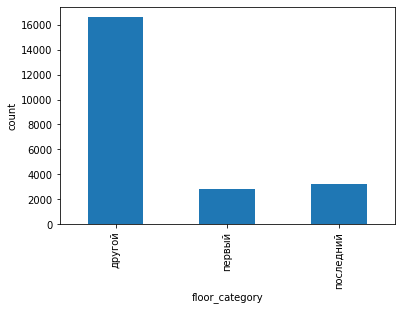

In [38]:
data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count');

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

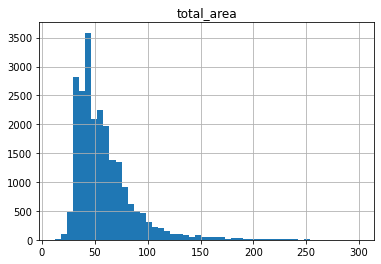

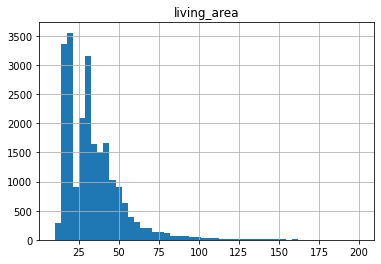

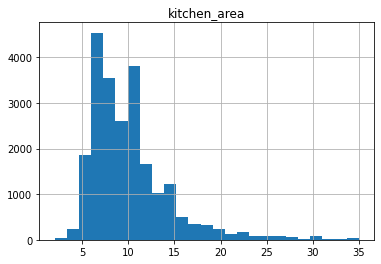

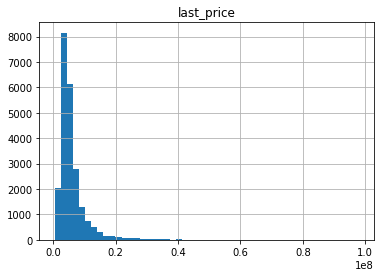

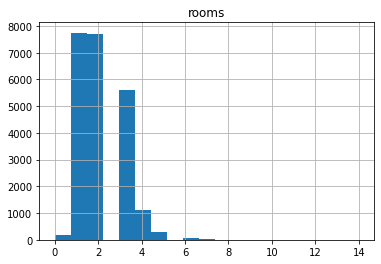

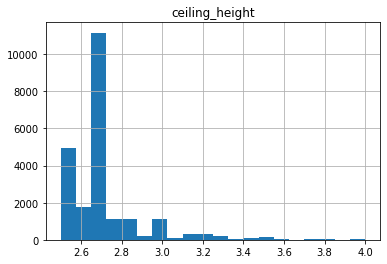

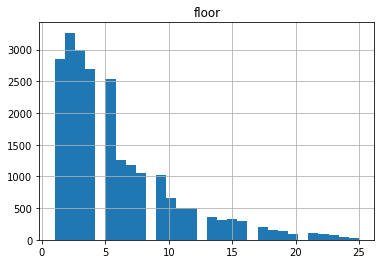

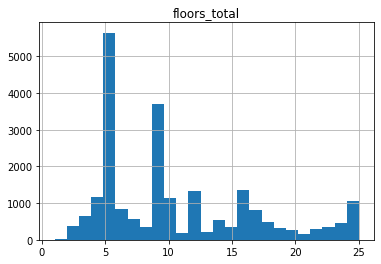

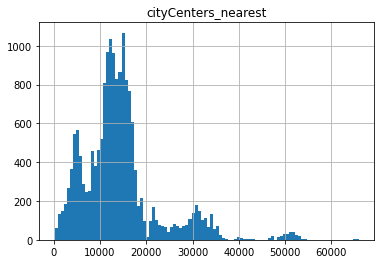

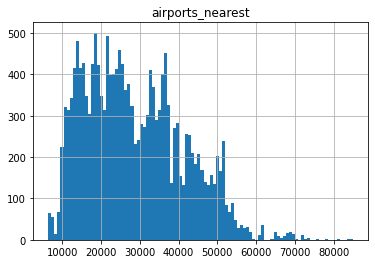

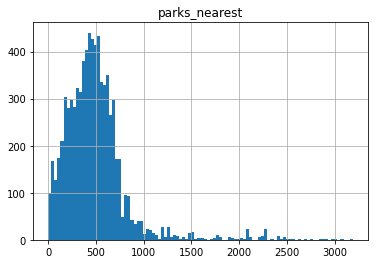

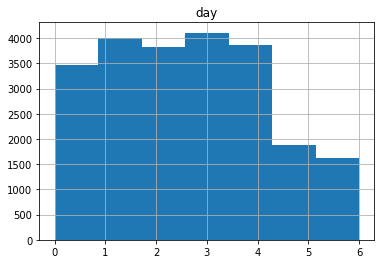

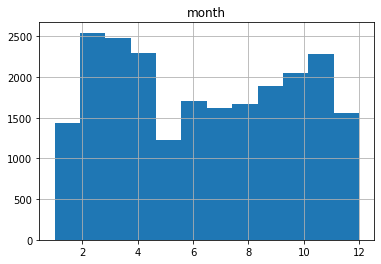

In [39]:
data.hist('total_area', bins=50)
data.hist('living_area', bins=50,range=(10,200))
data.hist('kitchen_area', bins=25)
data.hist('last_price', bins=50)
data.hist('rooms', bins=19)
data.hist('ceiling_height', bins=20)
data.hist('floor', bins=30)
data.hist('floors_total', bins=25)
data.hist('cityCenters_nearest', bins=100)
data.hist('airports_nearest', bins=100)
data.hist('parks_nearest', bins=100)
data.hist('day', bins=7)
data.hist('month', bins=12)

Наблюдаем очень малое количество квартир с общей площадью более 100 кв.м. Большая часть около 50 кв.м.

Жилая площадь - наблюдается спад после 75 кв.м. Также интересны два пика, и резкое падение около 25 кв.м.

Площадь кухни колеблется в основном от 5 до 20 кв.м.

Цена объекта в основном находится в диапозоне до 20 миллионов

Больше всего двух и трёх комнатных квартир

Высота потолка в основном 2.5м

Больше всего квартир в категории "другой" этаж

Больше всего квартир с 1 по 5 этаж

Общее количество эатжей в доме видим пики на 5-этажных и 9-этажных объектах

Расстояние до центра города в метрах Здесь наблюдаем два пика 10 км. до 15 км и один поменьше ~ 5 км.

Расстояние до ближайшего аэропорта распределяется примерно равномерно на расстоянии 10-50 км.

расстояние до ближайшего парка состовляет как правило 500-800 метров 

Видим резкий спад кол-ва публикации  в субботу и воскресенье.Также видим что весной был скачок активност, который окончился резким падением в мае. После плавно рос до ноября, где вновь произошло падение 

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

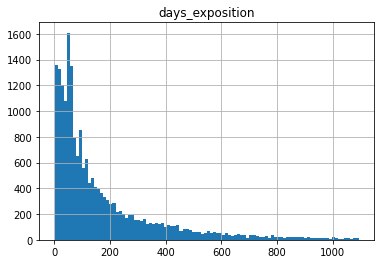

In [40]:
data.hist('days_exposition', bins=100)

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

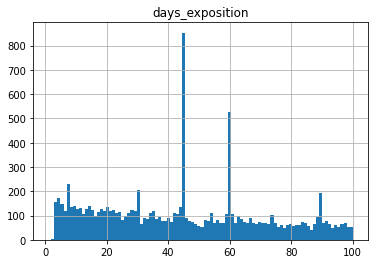

In [41]:
data.hist('days_exposition', bins=100, range=(1,100))

Из гистограммы можем сделать вывод, что чаще всего квартиры продают за 45,60 дней, также можем увидеть пик на 90 днях

In [42]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

171.2593193690724
93.0


Можно сделать вывод что до 45 дней-быстрая продажа

от 45 до 200 обычная

далее - долгая

**Изменения снизу**

**Если правильно прочитал условие размещения объявлений, то следует, что через 45,60 и 90 дней объвления снимаются с продаж в связи с истекшим сроком публикаций, тогда рассмотрим гистограмму, медиану и среднее без учёта этих дней**

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

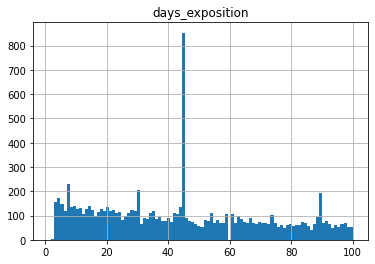

In [43]:
data.drop(index=data.query('days_exposition==45').index,inplace=True)
data.drop(index=data.query('days_exposition==60').index,inplace=True)
data.drop(index=data.query('days_exposition==90').index,inplace=True)
data.hist('days_exposition',bins=100,range=(1,100))

In [44]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

174.3147472642001
98.0


In [45]:
data['days_exposition'].describe()

count    19190.000000
mean       174.314747
std        199.271955
min          1.000000
25%         43.000000
50%         98.000000
75%        230.000000
max       1095.000000
Name: days_exposition, dtype: float64

Заметим что все равно наблюдается пик рядом с 45 и 90, а именно 43 и 98, значит все-таки теория подтверждается, но медиана и среднее немного увеличлись, тогда сделаем предположение что

быстрая продажа до 43 дней

нормальная от 43 до 230 дней

долгая более 230 дней

In [46]:
data.shape

(22240, 28)

Если удалим эти выбросы, то останется примерно 94% исходной информации, значит это не повлияет на остальное исследование

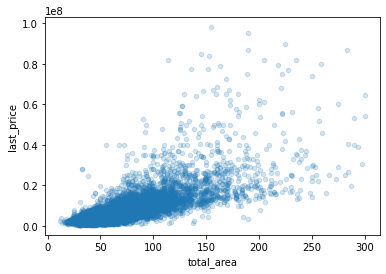

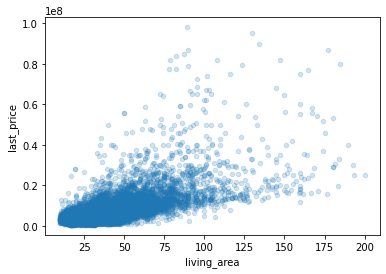

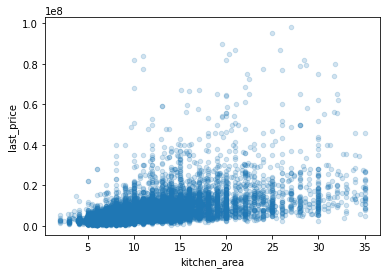

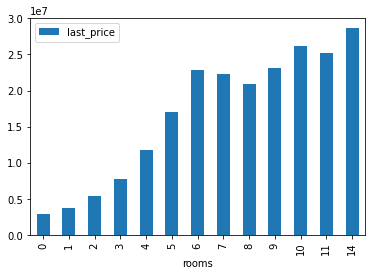

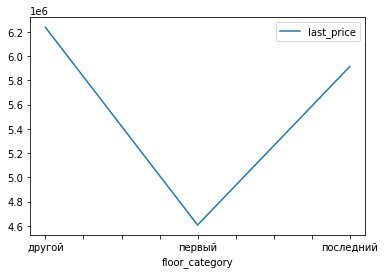

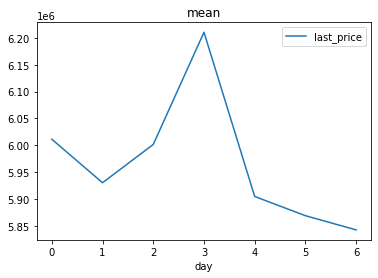

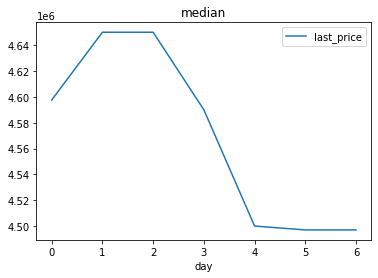

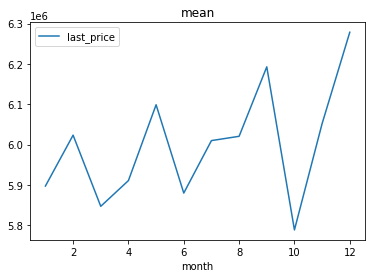

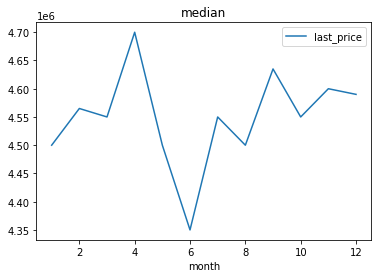

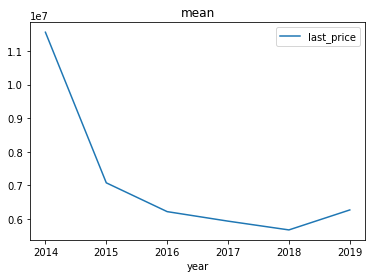

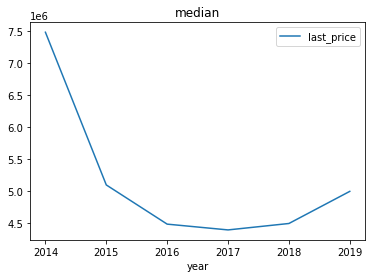

In [47]:
data.plot(y='last_price', x='total_area', kind='scatter', alpha=0.2)
data.plot(y='last_price', x='living_area', kind='scatter', alpha=0.2)
data.plot(y='last_price', x='kitchen_area', kind='scatter', alpha=0.2)
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar');
data.pivot_table(index='floor_category',values='last_price',aggfunc='mean').plot(y='last_price', kind='line')
data.pivot_table(index='day',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='day',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');
data.pivot_table(index='month',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');
data.pivot_table(index='year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

Логичная зависимость: при увеличении общей плошади, площади кухни и плошади жилой зоны, количества комнат цена растет

Интересно заметить, что на первом этаже самые дешёвые квартиры.

Нельзя определить зависит ли стоимость квартиры от дня или месяца публикации, но заметен спад цен от 2014 до 2016, дальше цена постепенно росла


In [48]:
city_top = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
city_top.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
city_top.sort_values(by=['last_price_count'],ascending=False, inplace=True)
city_top = city_top.iloc[:10]
display(city_top)
city_top['cost_per_m'] = city_top['last_price_sum']/city_top['total_area_sum']
city_top.sort_values(by=['cost_per_m'],ascending=True, inplace=True)
print('Максимальная среднняя цена')
display(city_top.loc[city_top['cost_per_m'] == city_top['cost_per_m'].max()])
print('Минимальная среднняя цена')
city_top.loc[city_top['cost_per_m'] == city_top['cost_per_m'].min()]

,last_price_sum,total_area_sum,last_price_count,total_area_count
locality_name,,,,
Санкт-Петербург,107117396455,914335.40,14712,14712
поселок Мурино,1714059462,20654.31,467,467
поселок Шушары,1725121999,22527.46,422,422
Всеволожск,1459481205,21647.35,387,387
Пушкин,2098015964,20075.80,346,346
Колпино,1260780246,17062.72,328,328
Гатчина,1020019360,14972.68,299,299
деревня Кудрово,1186731220,13048.96,284,284
Выборг,743303000,12908.46,231,231


Максимальная среднняя цена


,last_price_sum,total_area_sum,last_price_count,total_area_count,cost_per_m
locality_name,,,,,
Санкт-Петербург,107117396455,914335.4,14712,14712,117153.285824


Минимальная среднняя цена


,last_price_sum,total_area_sum,last_price_count,total_area_count,cost_per_m
locality_name,,,,,
Выборг,743303000,12908.46,231,231,57582.624109


<AxesSubplot:xlabel='city_centers_nearest_km'>

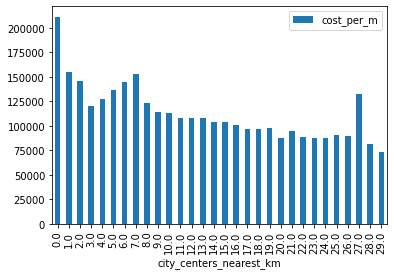

In [49]:
spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', values='cost_per_m')
spb.plot(kind='bar')

Видим что самая большая цена в километре от центра.  Цена падает при расстоянии до 3 км, затем рост и пик достигается на расстоянии 7км. Дальше спад и неожиданный пик на расстоянии 27 км

### Общий вывод

Исследовали рынок недвижимости Санкт-Петербурга и соседних населённых пунктах.

Определили примерное описание недвижимости:

1)Большая часть недвижимости порядка 50 кв.м. 

2)Цена объекта в основном находится в диапозоне до 20 миллионов

3)Больше всего двух и трёх комнатных квартир

4)Больше всего квартир с 1 по 5 этаж

5)Общее количество этажей в доме чаще всего 5 или 9 этажей

6)Расстояние до ближайшего парка состовляет как правило 500-800 метров 



Наибольшее влияние на стоимость квартиры оказывает её площадь. Чем больше площадь квартиры, тем выше её стоимость. Также на стоимость квартиры влияет и количество комнат. Чем больше комнат, тем выше стоимость. На стоимость квартиры также влияет расстояние до центра города. Чем ближе квартира располагается к центру, тем выше ее стоимость. Самая большая цена в на расстоянии от 1 до 7 км до центра Петербурга. 


Ожидаемое время продажи объекта недвижимости от 45 до 200 дней.

**Топ-10 населенных пунктов по количеству объявлений:**

Санкт-Петербург 14712

поселок Мурино 467

поселок Шушары 422

Всеволожск 387

Пушкин 346

Колпино 328

Гатчина 299

деревня Кудрово 284

Выборг 231

поселок Парголово 195

Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге - 117153 рублей

Самая низкая средняя стоимость квадратного метра в Выборге -57582 рублей

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод